In [45]:
print("wewe")

wewe


In [46]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

from langgraph.graph.message import add_messages

In [47]:
class State(TypedDict):

    messages:Annotated[list, add_messages]


graph_builder= StateGraph(State)

In [48]:
graph_builder

In [49]:
import os 
from dotenv import load_dotenv

In [50]:
load_dotenv()

True

In [73]:
from langchain_openai import ChatOpenAI
#from langchain.chat_models import init_chat_model

In [74]:
# llm = init_chat_model("openai:gpt-4o")


In [112]:
def chatbot(state:State):

    model = ChatOpenAI(temperature=0, model="gpt-4o-mini")
    
    # Call the model with the current messages
    response = model.invoke(state['messages'])
    
    # The return value must be a dictionary with a key that matches the
    # key in our State class ('messages'). This will update the state.
    return {"messages": [response]}



#    return {"message":[llm.invoke(state["messages"])]}

In [113]:
graph_builder = StateGraph(State)
graph_builder.add_node("gptchatbot", chatbot)

graph_builder.add_edge(START,"gptchatbot")
graph_builder.add_edge("gptchatbot",END)


In [114]:
graph = graph_builder.compile()

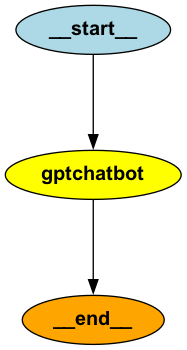

In [115]:
from IPython.display import Image, display

    # Get the graph object for visualization
graph_image = graph.get_graph()

    # Display the graph (e.g., in a Jupyter Notebook)
display(Image(graph_image.draw_png()))

In [116]:
graph_image.draw_png("my_langgraph.png")

In [117]:
graph.invoke({"messages":"hi haha"})

{'messages': [HumanMessage(content='hi haha', additional_kwargs={}, response_metadata={}, id='62461ace-1d95-4073-9e6e-945406eb181a'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 9, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BqRHzLTThZMo3BdHAeyKRpMKEbuLV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7385b8c0-3465-41ec-b8f5-cedfd7d17c2e-0', usage_metadata={'input_tokens': 9, 'output_tokens': 9, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [ ]:
for event in graph.stream({"messages":"hi what re what doings ??"}):
    for value in event.values():
        print(value["messages"][-1].content)



Hello! I'm here to help you with any questions or topics you'd like to discuss. What’s on your mind?
